In [1]:
import pandas as pd

df = pd.read_csv("03_Clustering_Marketing.csv")  
print(df.head())
print(df.info())


   gradyear gender     age  NumberOffriends  basketball  football  soccer  \
0      2007    NaN     NaN                0           0         0       0   
1      2007      F   17.41               49           0         0       1   
2      2007      F  17.511               41           0         0       0   
3      2006      F     NaN               36           0         0       0   
4      2008      F  16.657                1           0         0       0   

   softball  volleyball  swimming  ...  blonde  mall  shopping  clothes  \
0         0           0         0  ...       0     0         0        0   
1         0           0         1  ...       0     0         0        0   
2         0           0         0  ...       0     1         0        0   
3         0           0         0  ...       0     0         0        0   
4         0           0         1  ...       0     0         0        3   

   hollister  abercrombie  die  death  drunk  drugs  
0          0            0    0  

In [2]:
# בדיקה כמה ערכים חסרים בכל עמודה
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
gradyear              0
gender             1337
age                2496
NumberOffriends       0
basketball            0
football              0
soccer                0
softball              0
volleyball            0
swimming              0
cheerleading          0
baseball              0
tennis                0
sports                0
cute                  0
sex                   0
sexy                  0
hot                   0
kissed                0
dance                 0
band                  0
marching              0
music                 0
rock                  0
god                   0
church                0
jesus                 0
bible                 0
hair                  0
dress                 0
blonde                0
mall                  0
shopping              0
clothes               0
hollister             0
abercrombie           0
die                   0
death                 0
drunk                 0
drugs                 0
dtype: int64

In [3]:
df_clean = df.dropna()
print(f"\nTotal rows before cleaning: {len(df)}")
print(f"Total rows after cleaning: {len(df_clean)}")


Total rows before cleaning: 15000
Total rows after cleaning: 12042


In [ ]:
print("\nRows per gender after cleaning:")
print(df_clean['gender'].value_counts())


Rows per gender after cleaning:
gender
F    9710
M    2332
Name: count, dtype: int64


In [5]:
print("\nRows per graduation year after cleaning:")
print(df_clean['gradyear'].value_counts())


Rows per graduation year after cleaning:
gradyear
2006    3089
2008    3022
2007    3002
2009    2929
Name: count, dtype: int64


In [6]:
df_clean['age']  # לחשוב איך מעגלים את הגילאים שיהיו הגיוניים ולא הדבר המוזר הזה
                 # אלא אם כן זה חשוב שהערכים יהיו רציפים

1         17.41
2        17.511
4        16.657
5        18.034
6         18.53
          ...  
14995    16.329
14996    16.545
14997    17.999
14998    17.903
14999    15.811
Name: age, Length: 12042, dtype: object

In [7]:
# פילוח לפי גיל
print("\nRows per age after cleaning:")
print(df_clean['age'].value_counts())



Rows per age after cleaning:
age
16. Jun    24
16.591     20
17.399     20
17.443     19
17.311     19
           ..
96.474      1
23.014      1
73.221      1
20.244      1
19.975      1
Name: count, Length: 1887, dtype: int64


C:\Users\amits\AppData\Local\Temp\ipykernel_13768\848041399.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['age_cleaned'] = df_clean['age'].apply(clean_age)


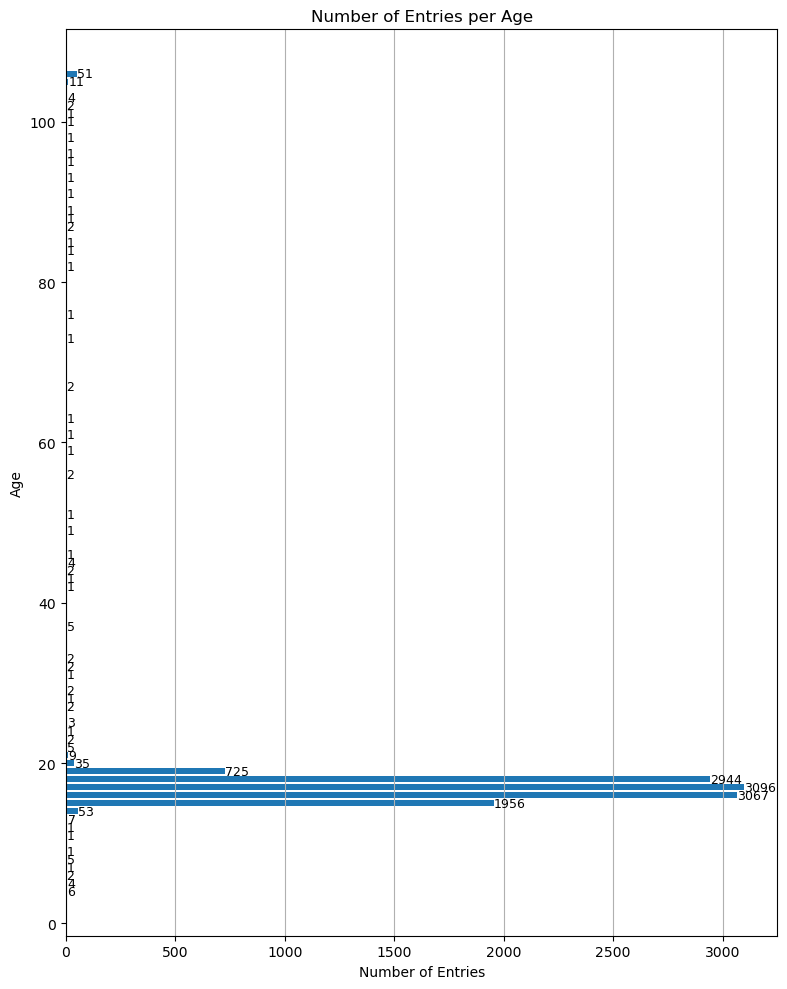

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Cleaning function
def clean_age(age):
    if pd.isnull(age):
        return None
    if isinstance(age, str):
        match = re.match(r'^(\d+)', age)
        if match:
            return int(match.group(1))
        return None
    try:
        return int(float(age))
    except:
        return None

# Apply the cleaning
df_clean['age_cleaned'] = df_clean['age'].apply(clean_age)
df_age = df_clean.dropna(subset=['age_cleaned'])

# Count and sort
age_counts = df_age['age_cleaned'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 10))
bars = plt.barh(age_counts.index, age_counts.values)

# Labels at end of bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2,
             str(int(width)), va='center', fontsize=9)

plt.ylabel("Age")
plt.xlabel("Number of Entries")
plt.title("Number of Entries per Age")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from scipy.sparse import csr_matrix

# טען את הדאטה
# df_clean = pd.read_csv('your_file.csv')

# הגדרת עמודות המילים בלבד (עמודות בינאריות)
word_columns = df_clean.columns[4:-2]
X = csr_matrix(df_clean[word_columns].values.astype(int))

# חישוב מטריצת חפיפה - כל תא מציין כמה מילים משותפות בין שני תלמידים
cooccurrence = X @ X.T
cooccurrence.setdiag(0)  # הסרה של ערכים על האלכסון
cooccurrence.eliminate_zeros()

# סינון רק לקשרים מעל סף מסוים
threshold = 3
cooccurrence = cooccurrence.multiply(cooccurrence >= threshold)

# בניית גרף
G = nx.from_scipy_sparse_array(cooccurrence)

# הוספת תכונות לכל צומת
for i in range(df_clean.shape[0]):
    G.nodes[i]['age'] = df_clean.loc[i, 'age_cleaned']
    G.nodes[i]['gender'] = df_clean.loc[i, 'gender']
    G.nodes[i]['friends'] = df_clean.loc[i, 'NumberOffriends']

# הדפסה לדוגמה
print(nx.info(G))


## There exist students with shared interests.

C:\Users\amits\AppData\Local\Temp\ipykernel_4536\878846239.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_keywords = sample_df[keyword_cols].applymap(lambda x: 1 if x > 0 else 0).values


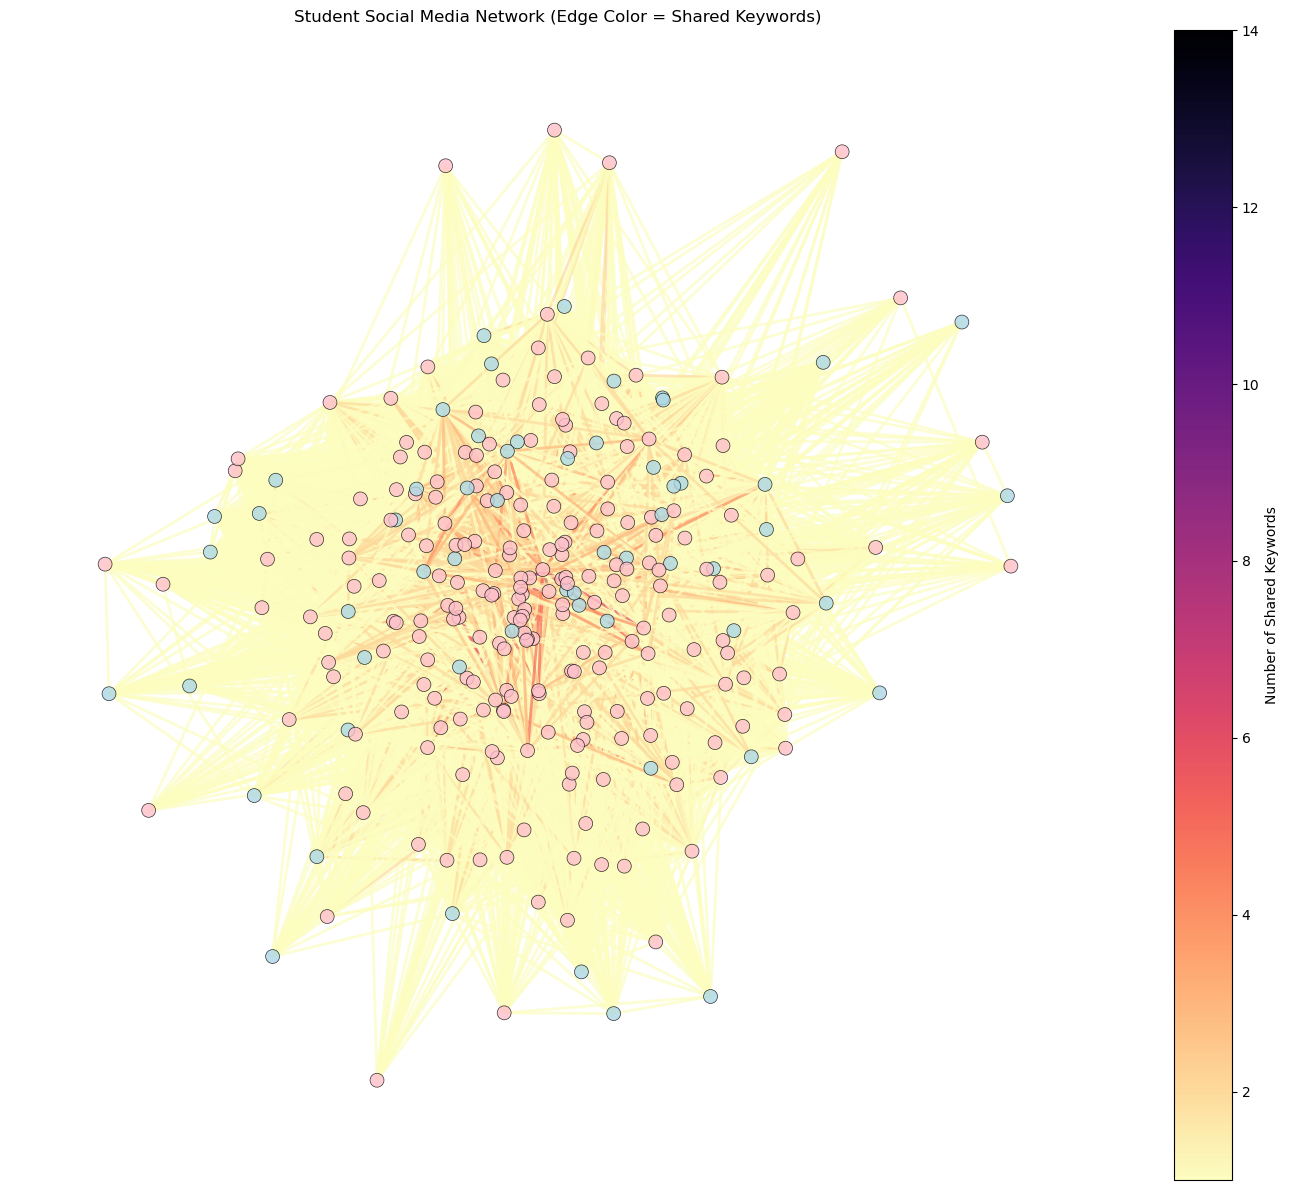

In [29]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Load and sample the data
df = pd.read_csv("cleaned_students_data.csv")
sample_df = df.sample(n=300, random_state=42)

# Extract keyword columns
meta_cols = ['gradyear', 'gender', 'age', 'NumberOffriends', 'age_cleaned', 'friends_group']
keyword_cols = [col for col in sample_df.columns if col not in meta_cols]

# Filter Out Low-Activity Users
keyword_counts = sample_df[keyword_cols].sum(axis=1)
sample_df = sample_df[keyword_counts > 0].reset_index(drop=True)

# Binary matrix: 1 if student used keyword, 0 otherwise
binary_keywords = sample_df[keyword_cols].applymap(lambda x: 1 if x > 0 else 0).values

# Create the graph
G = nx.Graph()

# Add nodes
for i in range(len(sample_df)):
    G.add_node(i, gender=sample_df.loc[i, 'gender'], age=sample_df.loc[i, 'age'])

# Add weighted edges based on number of shared keywords
for i in range(len(binary_keywords)):
    for j in range(i + 1, len(binary_keywords)):
        weight = np.dot(binary_keywords[i], binary_keywords[j])
        if weight > 0:
            G.add_edge(i, j, weight=weight)

# Drawing setup
fig, ax = plt.subplots(figsize=(14, 12))
pos = nx.spring_layout(G, seed=42)

# Node colors based on gender
node_colors = ['pink' if G.nodes[node]['gender'] == 'F' else 'lightblue' for node in G.nodes()]

# Extract edge weights and normalize for coloring
edges = G.edges()
weights = np.array([G[u][v]['weight'] for u, v in edges])
norm = mcolors.Normalize(vmin=weights.min(), vmax=weights.max())
cmap = cmap = cm.magma_r
edge_colors = [cmap(norm(w)) for w in weights]

# Draw nodes and edges
nx.draw_networkx_nodes(
    G, pos,
    node_color=node_colors,
    edgecolors='black',      # Dark circle border
    linewidths=0.5,          # Thickness of the border
    node_size=100,
    alpha=0.8,
    ax=ax
)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.7, width=2, ax=ax)

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(weights)  # This now has data
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Number of Shared Keywords")

# Final touches
ax.set_title("Student Social Media Network (Edge Color = Shared Keywords)")
ax.axis('off')
plt.tight_layout()
plt.show()



C:\Users\amits\AppData\Local\Temp\ipykernel_4536\776508536.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_keywords = group_df[keyword_cols].applymap(lambda x: 1 if x > 0 else 0).values
C:\Users\amits\AppData\Local\Temp\ipykernel_4536\776508536.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_keywords = group_df[keyword_cols].applymap(lambda x: 1 if x > 0 else 0).values
C:\Users\amits\AppData\Local\Temp\ipykernel_4536\776508536.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_keywords = group_df[keyword_cols].applymap(lambda x: 1 if x > 0 else 0).values
C:\Users\amits\AppData\Local\Temp\ipykernel_4536\776508536.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_keywords = group_df[keyword_cols].applymap(lambda x: 1 if x > 0 else 0).values
C:\Users\amits\AppData\Local\Temp\ipykernel_4536\7765085

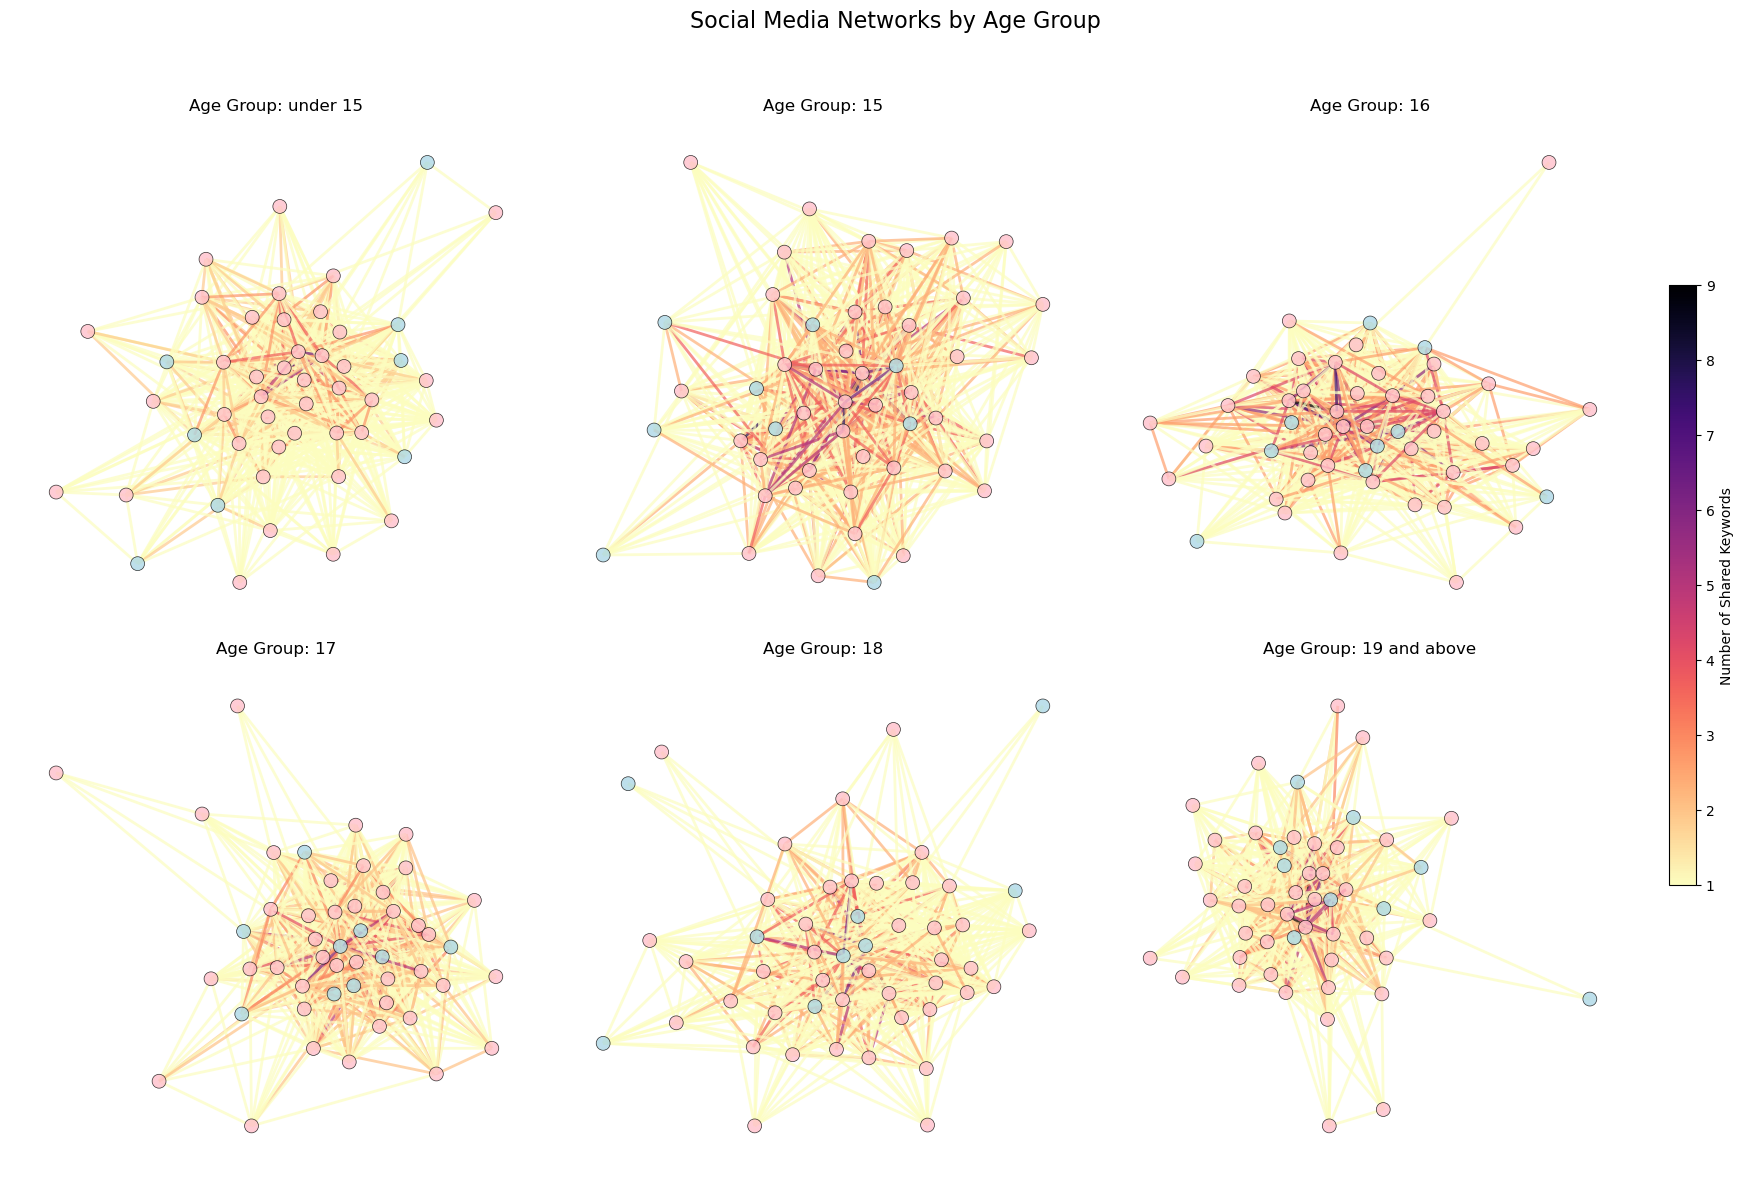

In [27]:
# Define age group bins and labels using the full dataset
bins = [0, 15, 16, 17, 18, 19, 30]
labels = ['under 15', '15', '16', '17', '18', '19 and above']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# Set up plot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Color map for edges
cmap = cm.magma_r

for idx, age_group in enumerate(labels):
    ax = axes[idx]
    group_df = df[df['age_group'] == age_group].copy()
    
    if group_df.empty:
        ax.set_title(f"{age_group} (No Data)")
        ax.axis('off')
        continue

    # Extract keyword columns
    keyword_cols = [col for col in df.columns if col not in meta_cols + ['age_group']]

    # Filter out users with no keywords
    keyword_counts = group_df[keyword_cols].sum(axis=1)
    group_df = group_df[keyword_counts > 0]
    group_df = group_df.sample(n=min(len(group_df), 50), random_state=42).reset_index(drop=True)

    if group_df.empty:
        ax.set_title(f"{age_group} (No Active Users)")
        ax.axis('off')
        continue

    # Binary keyword matrix
    binary_keywords = group_df[keyword_cols].applymap(lambda x: 1 if x > 0 else 0).values

    # Set threshold
    threshold = 1  # Only keep edges with 3 or more shared keywords

    # Create a new empty graph
    G = nx.Graph()

    # Temporary list to collect valid edges and nodes
    valid_edges = []
    valid_nodes = set()

    # Add edges with weight >= threshold
    for i in range(len(binary_keywords)):
        for j in range(i + 1, len(binary_keywords)):
            weight = np.dot(binary_keywords[i], binary_keywords[j])
            if weight >= threshold:
                valid_edges.append((i, j, weight))
                valid_nodes.update([i, j])

    # Add valid nodes to the graph
    for node in valid_nodes:
        G.add_node(node, gender=sample_df.loc[node, 'gender'], age=sample_df.loc[node, 'age'])

    # Add valid edges to the graph
    for u, v, weight in valid_edges:
        G.add_edge(u, v, weight=weight)

    pos = nx.spring_layout(G, seed=42)
    node_colors = ['pink' if G.nodes[node]['gender'] == 'F' else 'lightblue' for node in G.nodes()]

    # Normalize edge weights
    if G.number_of_edges() > 0:
        weights = np.array([G[u][v]['weight'] for u, v in G.edges()])
        norm = mcolors.Normalize(vmin=weights.min(), vmax=weights.max())
        edge_colors = [cmap(norm(w)) for w in weights]
    else:
        edge_colors = []

    # Draw graph
    nx.draw_networkx_nodes(
        G, pos,
        node_color=node_colors,
        edgecolors='black',
        linewidths=0.5,
        node_size=100,
        alpha=0.8,
        ax=ax
    )
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.7, width=2, ax=ax)

    ax.set_title(f"Age Group: {age_group}")
    ax.axis('off')

# Add shared colorbar
fig.subplots_adjust(right=0.92)
cbar_ax = fig.add_axes([0.93, 0.25, 0.015, 0.5])
sm = cm.ScalarMappable(cmap=cmap, norm=norm if G.number_of_edges() > 0 else mcolors.Normalize(0, 1))
sm.set_array(weights if G.number_of_edges() > 0 else np.array([0, 1]))
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Number of Shared Keywords")

plt.suptitle("Social Media Networks by Age Group", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.92, 0.95])
plt.show()


## There exist edges with a very large weight, i.e student with a lot in common.

Maximum Edge Weight: 14


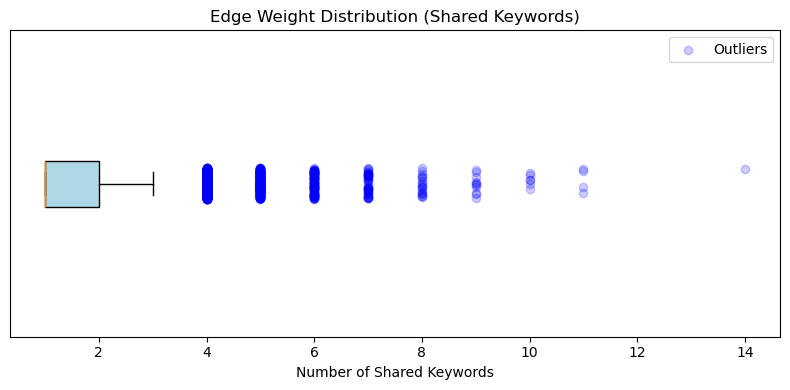

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print("Maximum Edge Weight:", weights.max())

# Example weights array for testing if you don't already have one
# weights = np.random.poisson(3, size=100)

# Convert weights to DataFrame
weights_df = pd.DataFrame({'weights': weights})

# Compute IQR and outliers
Q1 = weights_df['weights'].quantile(0.25)
Q3 = weights_df['weights'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (weights_df['weights'] < (Q1 - 1.5 * IQR)) | (weights_df['weights'] > (Q3 + 1.5 * IQR))
outliers = weights_df[outlier_condition]['weights']

plt.figure(figsize=(8, 4))

# Box plot (no fliers shown)
plt.boxplot(weights, vert=False, patch_artist=True,
            showfliers=False,
            boxprops=dict(facecolor='lightblue'))

# Scatter outliers slightly above the box (y=1)
jitter_y = np.random.uniform(0.95, 1.05, size=len(outliers))
plt.scatter(outliers, jitter_y, color='blue', alpha=0.2, label="Outliers")

# Final touches
plt.xlabel("Number of Shared Keywords")
plt.title("Edge Weight Distribution (Shared Keywords)")
plt.yticks([])  # Hide y-axis ticks
plt.legend()
plt.tight_layout()
plt.show()


## Incorporating the frequency of words into the edges' weight calculation.

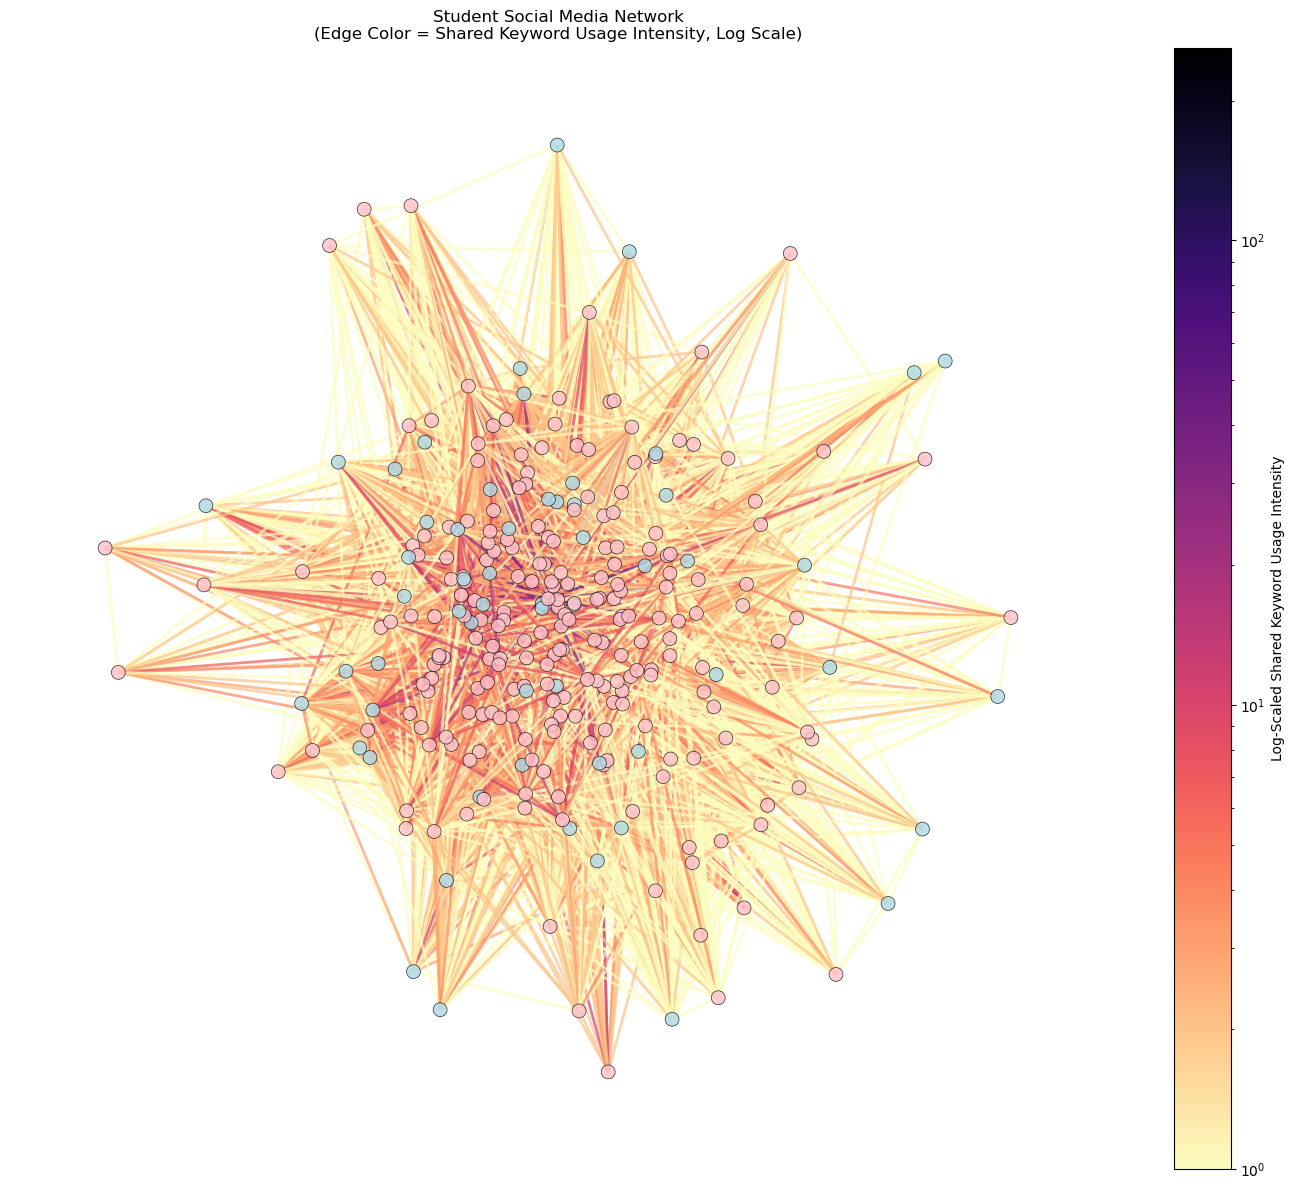

In [60]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Load and sample the data
df = pd.read_csv("cleaned_students_data.csv")
sample_df = df.sample(n=300, random_state=42)

# Extract keyword columns
meta_cols = ['gradyear', 'gender', 'age', 'NumberOffriends', 'age_cleaned', 'friends_group']
keyword_cols = [col for col in sample_df.columns if col not in meta_cols]

# Filter out students with no keyword activity
keyword_counts = sample_df[keyword_cols].sum(axis=1)
sample_df = sample_df[keyword_counts > 0].reset_index(drop=True)

# Use actual keyword usage counts
keyword_usage = sample_df[keyword_cols].values  # [num_students, num_keywords]

# Create the graph
G = nx.Graph()

# Add nodes
for i in range(len(sample_df)):
    G.add_node(i, gender=sample_df.loc[i, 'gender'], age=sample_df.loc[i, 'age'])

# Add edges based on weighted dot product
for i in range(len(keyword_usage)):
    for j in range(i + 1, len(keyword_usage)):
        weight = np.dot(keyword_usage[i], keyword_usage[j])
        if weight > 0:
            G.add_edge(i, j, weight=weight)

# Drawing setup
fig, ax = plt.subplots(figsize=(14, 12))
pos = nx.spring_layout(G, seed=42)

# Node colors by gender
node_colors = ['pink' if G.nodes[node]['gender'] == 'F' else 'lightblue' for node in G.nodes()]

# Extract and log-normalize edge weights
edges = G.edges()
weights = np.array([G[u][v]['weight'] for u, v in edges])

# Use logarithmic normalization to enhance color contrast
norm = mcolors.LogNorm(vmin=max(weights.min(), 1), vmax=weights.max())
cmap = cm.magma_r
edge_colors = [cmap(norm(w)) for w in weights]

# Draw nodes and edges
nx.draw_networkx_nodes(
    G, pos,
    node_color=node_colors,
    edgecolors='black',
    linewidths=0.5,
    node_size=100,
    alpha=0.8,
    ax=ax
)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.7, width=2, ax=ax)

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(weights)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Log-Scaled Shared Keyword Usage Intensity")

# Final touches
ax.set_title("Student Social Media Network\n(Edge Color = Shared Keyword Usage Intensity, Log Scale)")
ax.axis('off')
plt.tight_layout()
plt.show()
